In [ ]:
# IMPORT LIBRARIES
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [202]:
# LOAD DATA
data=pd.read_csv(r"C:\Users\Yashashree M\Desktop\DROPOUT\Dropout_dataset.csv")

In [203]:
# DATA PREPROCESSING



In [204]:
data.info()   #to check the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [205]:
data.head()  #to check the first 5 rows of the data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [206]:
data.describe()  #to check the statistical summary of the data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [207]:
data.isnull().sum()  #to check for missing values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [208]:
data.nunique()  #to check the number of unique values in each column

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [209]:
# Identify columns with only one unique value
unique_value_counts = data.nunique()
single_value_columns = unique_value_counts[unique_value_counts == 1]
single_value_columns

Series([], dtype: int64)

In [210]:
# Data Analysis and Visualization

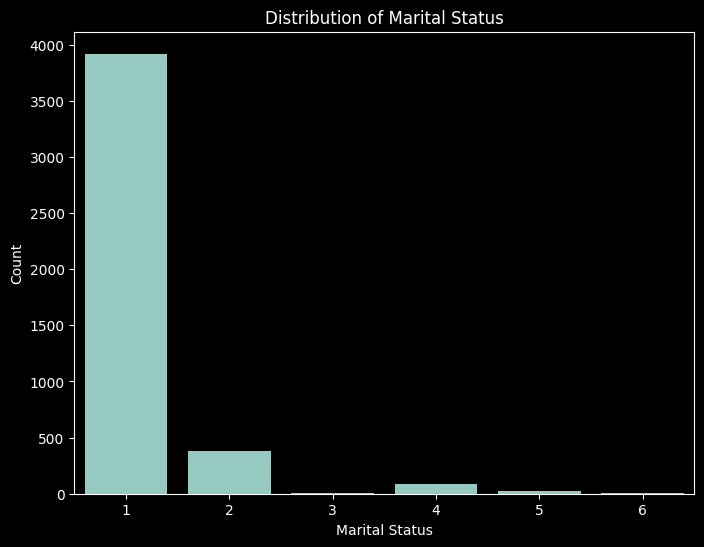

In [211]:
# Plot Distribution of Marital status 
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital status', data=data)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

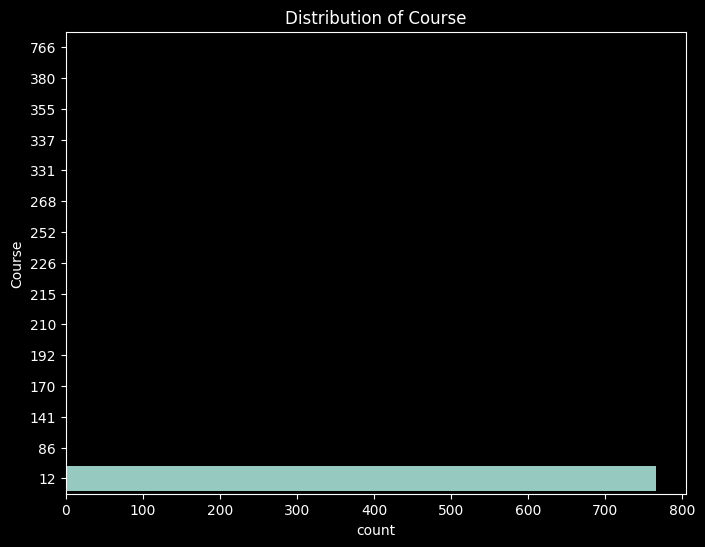

In [212]:
# Plot Distribution for Course
plt.figure(figsize=(8, 6))
sns.countplot(y='Course', data=data, order=data['Course'].value_counts())
plt.title('Distribution of Course')
plt.show()

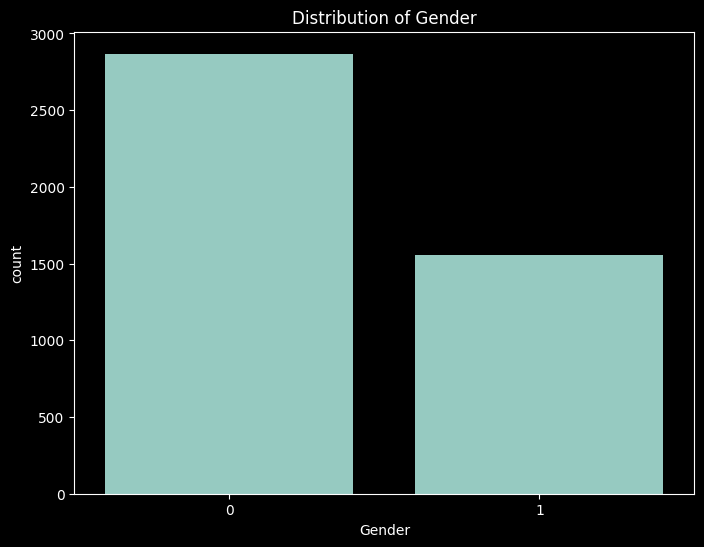

In [213]:
# Plot Distribution for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

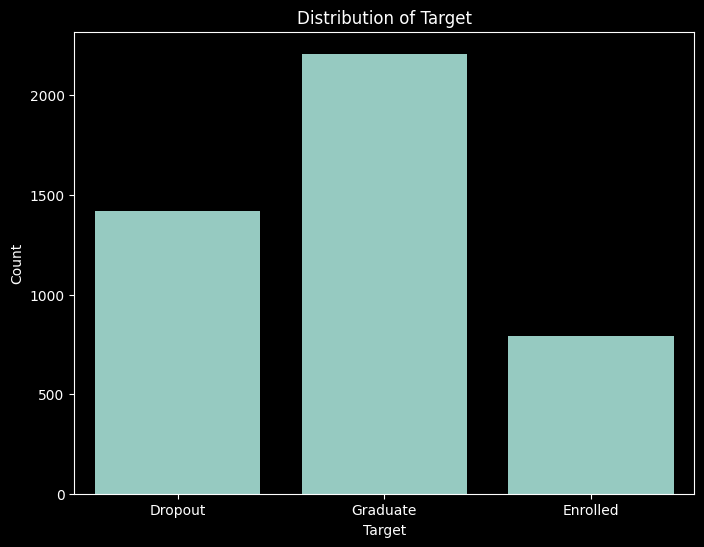

In [214]:
# Plot Distribution for Target variable 
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [215]:
# remove non-numeric columns except the target variable
numeric_data= data.select_dtypes(include=['float', 'int'])
numeric_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


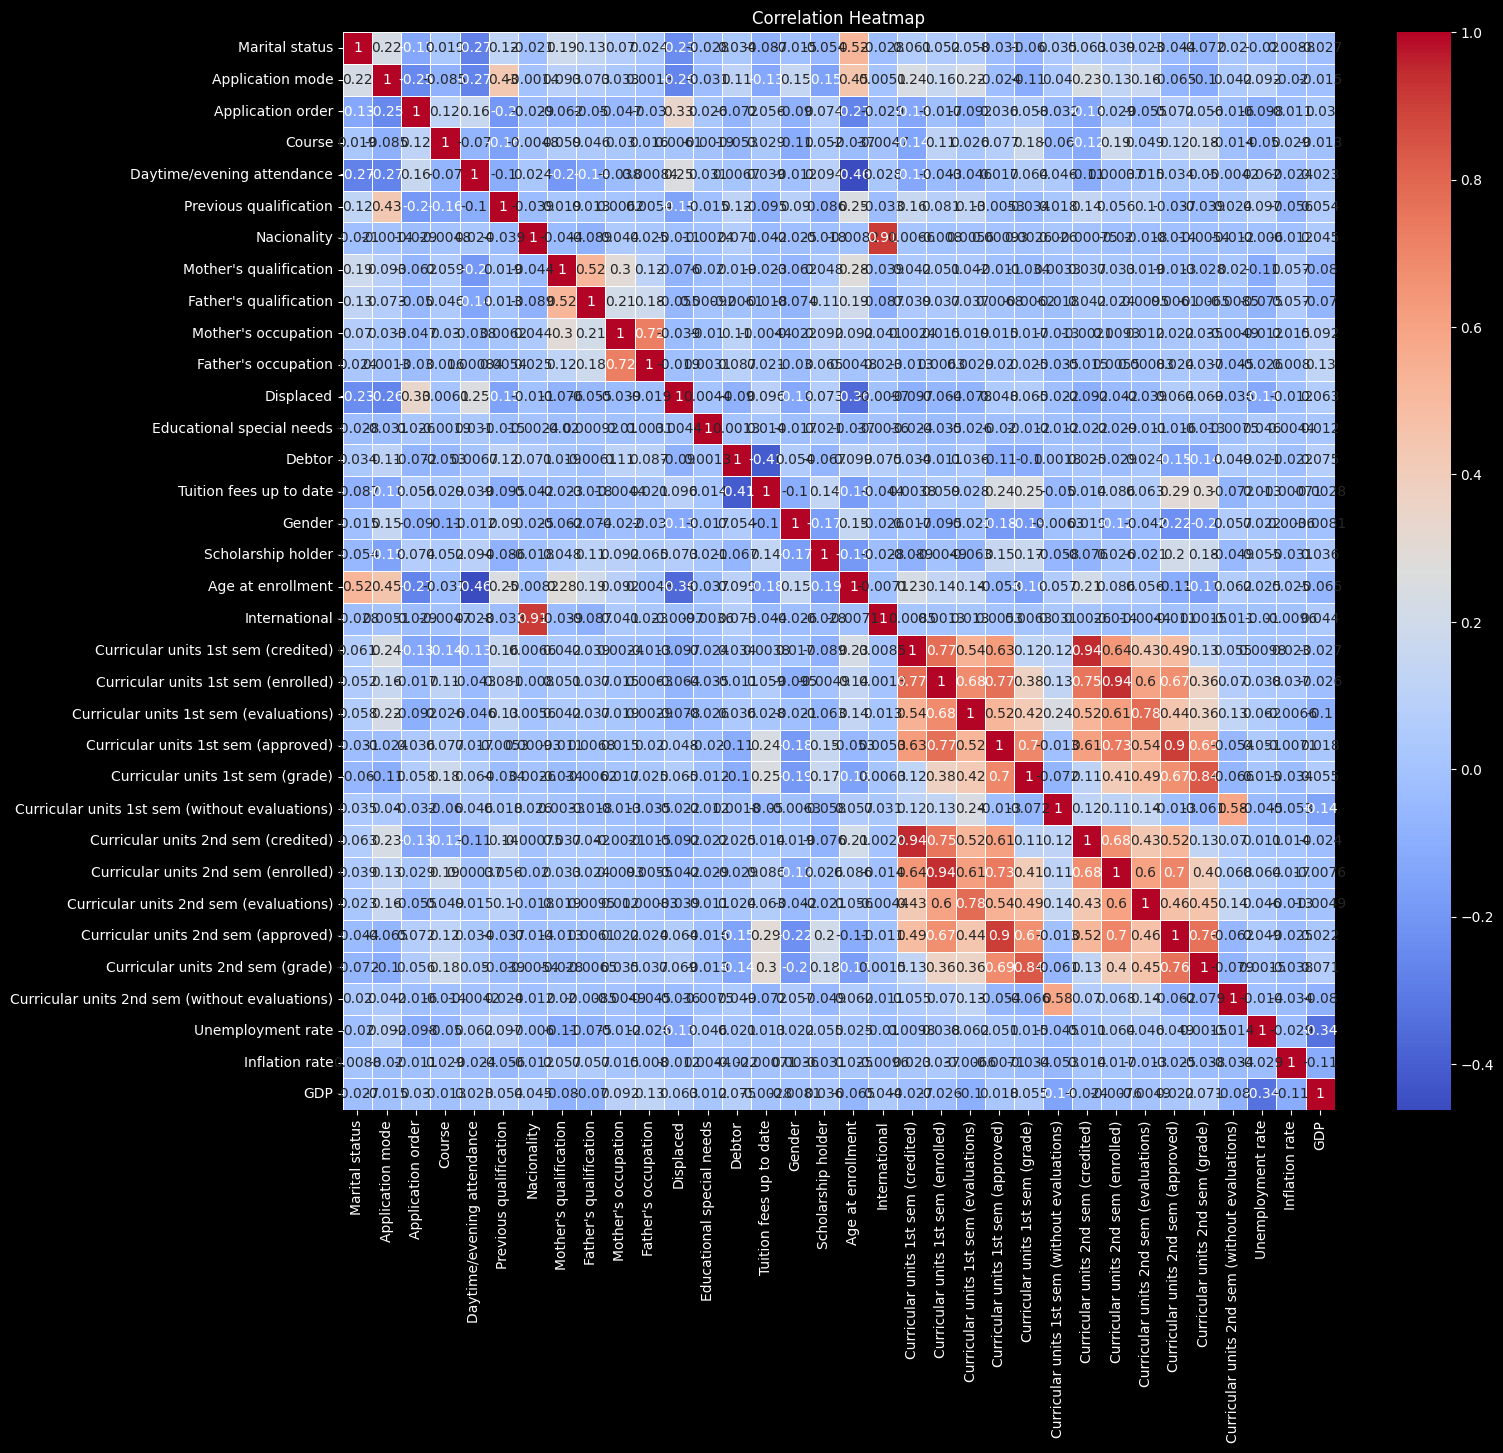

In [216]:
# Heat map to check correlation between numeric features
plt.figure(figsize=(16, 14))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
correlation_matrix = numeric_data.corr()
plt.title('Correlation Heatmap')
plt.show()

In [217]:
# Filtering the required columns for model training
required_columns=["Marital status","Application mode","Application order","Course","Daytime/evening attendance","Previous qualification","Nacionality","Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment","International","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Target"]
data = data[required_columns]
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Target
0,1,8,5,2,1,1,1,13,10,6,...,1,0,20,0,0,0,0,0,0.000000,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,1,0,19,0,0,6,6,6,14.000000,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,1,0,19,0,0,6,0,0,0.000000,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,0,20,0,0,6,8,6,13.428571,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,0,45,0,0,6,9,5,12.333333,Graduate


In [218]:
# Check the categorical columns
data.select_dtypes(include=['object']).columns

Index(['Target'], dtype='object')

In [219]:
# Identify the categorical columns and convert them into boolean columns

boolean_cols = {
    'Daytime/evening attendance' : {1:True, 0:False},
    'Displaced' : {1:True, 0:False},
    'Educational special needs' : {1:True, 0:False},
    'Debtor' : {1:True, 0:False},
    'Tuition fees up to date' : {1:True, 0:False},
    'Gender' : {1:True, 0:False},
    'Scholarship holder' : {1:True, 0:False},
    'International' : {1:True, 0:False}
}



In [220]:
# Apply the mapping to the respective columns
for col, mapping in boolean_cols.items():
    data[col] = data[col].map(mapping)

In [221]:
# List of categorical columns to be one-hot encoded
categorical_cols = [
    'Marital status',
    'Application mode',
    'Course',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]

In [222]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap

In [223]:
# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(data[categorical_cols])

In [224]:
# Get proper column names for the encoded data
encoded_columns = encoder.get_feature_names_out(categorical_cols)

In [225]:
# create DataFrame
encoded_data = pd.DataFrame(encoded_data, columns=encoded_columns, index=data.index)

In [226]:
# Combine with original dataframe (optional)
data_final = pd.concat([data.drop(columns=categorical_cols), encoded_data], axis=1)

print(data_final.head())

   Application order  Daytime/evening attendance  Displaced  \
0                  5                        True       True   
1                  1                        True       True   
2                  5                        True       True   
3                  2                        True       True   
4                  1                       False      False   

   Educational special needs  Debtor  Tuition fees up to date  Gender  \
0                      False   False                     True    True   
1                      False   False                    False    True   
2                      False   False                    False    True   
3                      False   False                     True   False   
4                      False   False                     True   False   

   Scholarship holder  Age at enrollment  International  ...  \
0               False                 20          False  ...   
1               False                 19          Fals

In [227]:
# List of numerical columns to be scaled
numerical_cols = [
    "Application order",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)"
]


In [228]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the numerical columns
data_final[numerical_cols] = scaler.fit_transform(data_final[numerical_cols])

In [229]:
# Assuming "Target" contains categorical values like "Dropout", "Graduate", "Enrolled", etc.
data["Target_encoded"] = data["Target"].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

In [230]:
# TESTING THE MODEL

In [231]:
# Define feature [x] and target variable [y]
X = data_final.drop(columns=["Target"]) # drop the original target

y = data_final["Target"] # Target variable

# Encode the target variable as binary (1 for Dropout, 0 for others)
y_binary=(y=="Dropout").astype(int)  # Assuming 'Dropout' is encoded as 0, adjust if necessary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=42)

# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3539, 226) (885, 226) (3539,) (885,)


In [232]:
# LOGISTIC REGRESSION

In [233]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

Random Forest Evaluation for Dropout Prediction
Accuracy: 74.0%


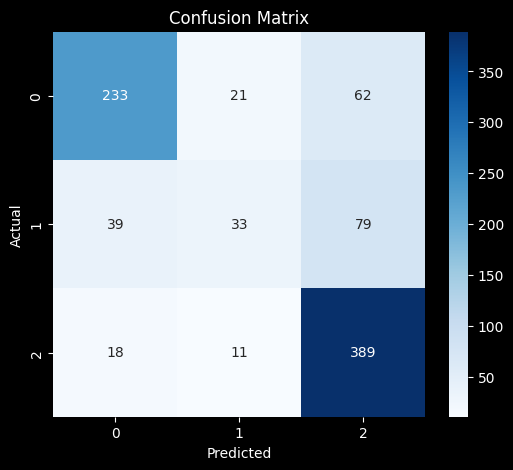


Classification Report:

              precision    recall  f1-score   support

     Dropout       0.80      0.74      0.77       316
    Enrolled       0.51      0.22      0.31       151
    Graduate       0.73      0.93      0.82       418

    accuracy                           0.74       885
   macro avg       0.68      0.63      0.63       885
weighted avg       0.72      0.74      0.71       885



In [234]:
# Evaluate the model

print("Random Forest Evaluation for Dropout Prediction")

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)* 100
print(f"Accuracy: {accuracy:.1f}%")

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

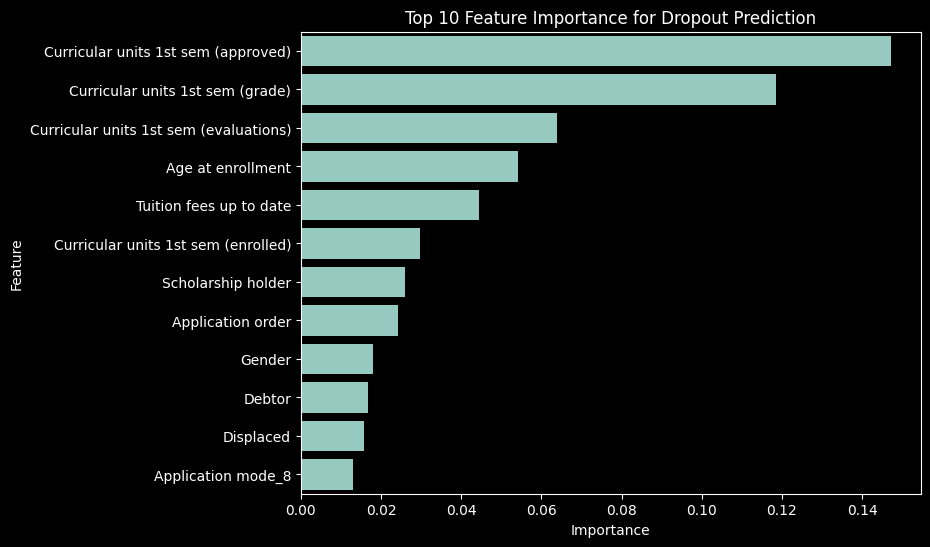

In [235]:
# Get feature importance directly from RandomForest model
feature_importances = rf_model.feature_importances_

# Create DataFrame
features = X_train.columns
importance_data = pd.DataFrame({'Feature': features,'Importance': feature_importances})

# Sort and select top 10

top_10_importance_data = importance_data.sort_values(by='Importance', ascending=False).head(12)

# Visualize the top 10 feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=top_10_importance_data)
plt.title("Top 10 Feature Importance for Dropout Prediction")
plt.xlabel("Importance")
plt.show()

In [236]:
# DEPLOYMENT


In [237]:

# Create directory model if it doesn't exist
os.makedirs("model", exist_ok=True)


In [238]:
# Save model Random Forest model using pickle
with open('model/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [239]:
# Save scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [240]:
# Save encoder
with open('model/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [241]:
# Create list of training columns
training_columns = X_train.columns.tolist()

In [242]:
# Save training columns
with open('model/training_columns.pkl', 'wb') as f:
    pickle.dump(training_columns, f)

In [243]:
# Clean data - This is just a placeholder for any final data cleaning steps before deployment.

data.dtypes

Marital status                              int64
Application mode                            int64
Application order                           int64
Course                                      int64
Daytime/evening attendance                   bool
Previous qualification                      int64
Nacionality                                 int64
Mother's qualification                      int64
Father's qualification                      int64
Mother's occupation                         int64
Father's occupation                         int64
Displaced                                    bool
Educational special needs                    bool
Debtor                                       bool
Tuition fees up to date                      bool
Gender                                       bool
Scholarship holder                           bool
Age at enrollment                           int64
International                                bool
Curricular units 1st sem (credited)         int64


In [244]:
data.to_csv('cleaned_data.csv',index=False)